In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN

## Loading the dataset

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\diabetes.csv")

## Data Cleaning

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Checking for zero values**

In [6]:
cols_with_zero_issues = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_with_zero_issues]== 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [7]:
df[cols_with_zero_issues] = df[cols_with_zero_issues].replace(0,np.nan)

In [8]:
df.fillna(df.median(), inplace=True)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Treating the Glucose Column**

In [11]:
df[df['Glucose'] < 70].shape

(11, 9)

In [12]:
df.loc[df['Glucose'] < 70, 'Glucose'] = np.nan

In [13]:
df['Glucose'].fillna(df['Glucose'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3176\3317550487.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].median(), inplace=True)


**Treating the BloodPressure Column**

In [14]:
df[df['BloodPressure'] < 40].shape

(4, 9)

In [15]:
df.loc[df['BloodPressure'] < 40, 'BloodPressure'] = np.nan

In [16]:
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3176\823437581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)


**Treating the SkinThickness Column**

- Box Plot Showing the SkinThickness Distribution

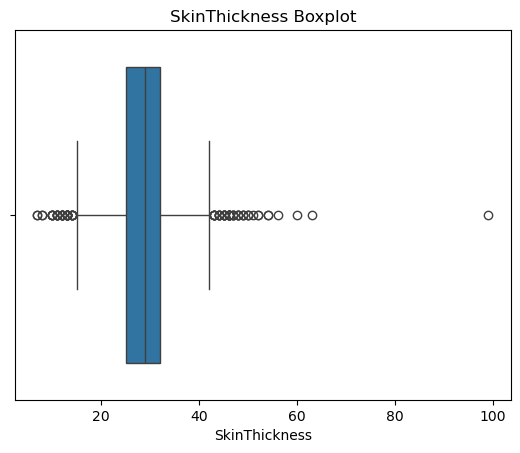

In [17]:
sns.boxplot(x=df['SkinThickness'])
plt.title('SkinThickness Boxplot')
plt.show()

- Using IQR to Detect Outliers

In [18]:
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
outliers = df[(df['SkinThickness'] < lower_bound) | (df['SkinThickness'] > upper_bound)]
print(f"Number of SkinThickness outliers: {outliers.shape[0]}")

Number of SkinThickness outliers: 87


**Treating the Insulin Column**

- Visualization Using a Box Plot

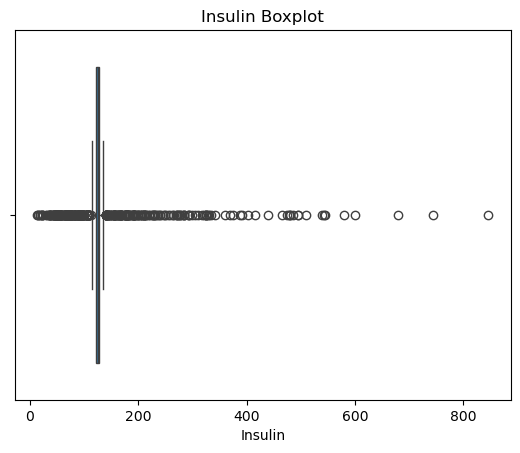

In [20]:
sns.boxplot(x=df['Insulin'])
plt.title('Insulin Boxplot')
plt.show()

In [21]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
outliers = df[(df['Insulin'] < lower_bound) | (df['Insulin'] > upper_bound)]
print(f"Number of insulin outliers: {outliers.shape[0]}")

Number of insulin outliers: 346


**Scatter Plot Showing Glucose vs Insulin by Outcome**

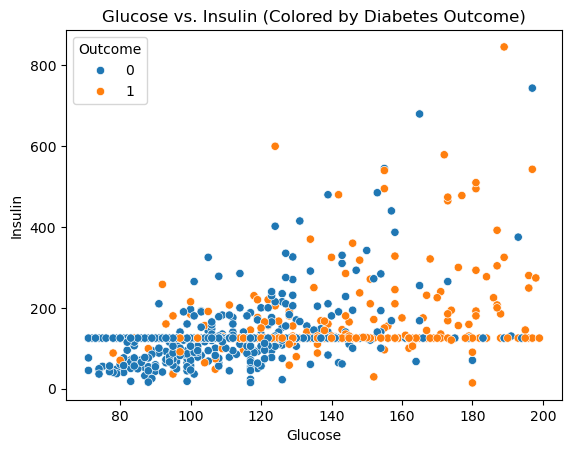

In [23]:
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome')
plt.title('Glucose vs. Insulin (Colored by Diabetes Outcome)')
plt.show()

- There is a concentration of blue dots(no diabetes) at lower glucose and Insulin levels.
- Diabetes cases (orange dot) appear more often at higher Glucose level.
- Many points are clumped near the bottom(low insulin), including both diabetic and non-diabetic cases, suggesting possible missing or zero values.

**Treating the BMI Column**

- Scatter Plot to show Glucose vs BMI by Outcome 

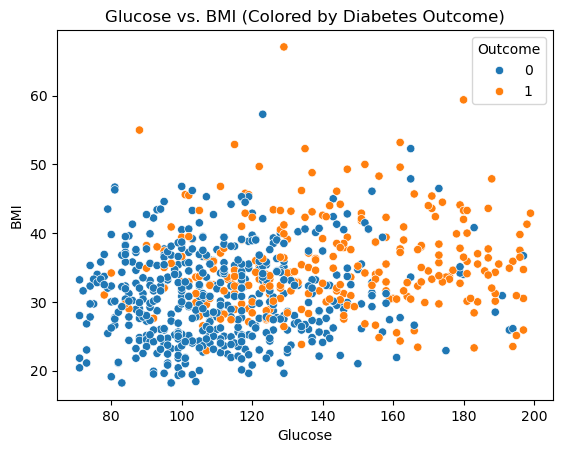

In [29]:
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')
plt.title('Glucose vs. BMI (Colored by Diabetes Outcome)')
plt.show()

- Diabetes (orange dots) are more concentrated in the upper right region(higher Glucose and higher BMI)
- Non-diabetics(blue dots)tend to cluster in the lower-left (lower Glucose and BMI)
- There's a visible positive relationship: as Glucose increases, BMI tends to be higher, and those with both high values are more likely to be diabetic.

- Adding a new Column called BMICategory

In [25]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df.loc[df["BMI"] > 0, "BMICategory"] = df.loc[df["BMI"] > 0, "BMI"].apply(bmi_category)

- To count how many people fall into each category

In [26]:
df["BMICategory"].value_counts()

BMICategory
Obese          483
Overweight     179
Normal         102
Underweight      4
Name: count, dtype: int64

- To analyze Diabetes Prevalence by BMICategory

In [27]:
bmi_summary = df.groupby("BMICategory")["Outcome"].value_counts(normalize=True).unstack() * 100
bmi_summary.columns = ["No Diabetes", "Diabetes"]

print(bmi_summary)

             No Diabetes   Diabetes
BMICategory                        
Normal         93.137255   6.862745
Obese          54.244306  45.755694
Overweight     77.653631  22.346369
Underweight   100.000000        NaN


- Visualization to analyze prevalence by BMICategory

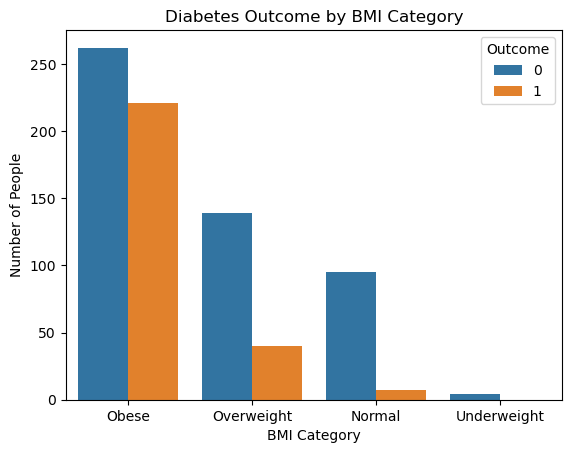

In [28]:
sns.countplot(x='BMICategory', hue='Outcome', data=df)
plt.title("Diabetes Outcome by BMI Category")
plt.ylabel("Number of People")
plt.xlabel("BMI Category")
plt.show()

The data shows a strong positive correlation between BMICategory and diabetes prevalence:
- Obese individuals have the highest diabetes rate at 45.8%
- Overweight individuals: 22.3% diabetic
- Normal weight individuals: Only 6.9% diabetic
- Underweight individuals: NaN diabetic (Possibly due to other health factors or small sample size)

This pattern support well-established medical findings - as BMI increases, so does diabetes risk. Obesity, in particular, appears to be the major contributing factor.

**Treating the Age Column**

- Using AgeGroup Bins

In [32]:
bins = [20, 35, 50, 65, 85]
labels = ['Young adults', 'Middle Age', 'Older Adult', 'Elder Adult']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

- Creating a grouped table of Diabetes Prevalence

In [33]:
age_group_summary = df.groupby("AgeGroup")["Outcome"].value_counts(normalize=True).unstack()
age_group_summary.columns = ["No Diabetes", "Diabetes"]
age_group_summary = age_group_summary * 100
print(age_group_summary)

              No Diabetes   Diabetes
AgeGroup                            
Young adults    74.180328  25.819672
Middle Age      48.167539  51.832461
Older Adult     46.575342  53.424658
Elder Adult     75.000000  25.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_3176\2530968037.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = df.groupby("AgeGroup")["Outcome"].value_counts(normalize=True).unstack()


- Visualization using Bar Chart

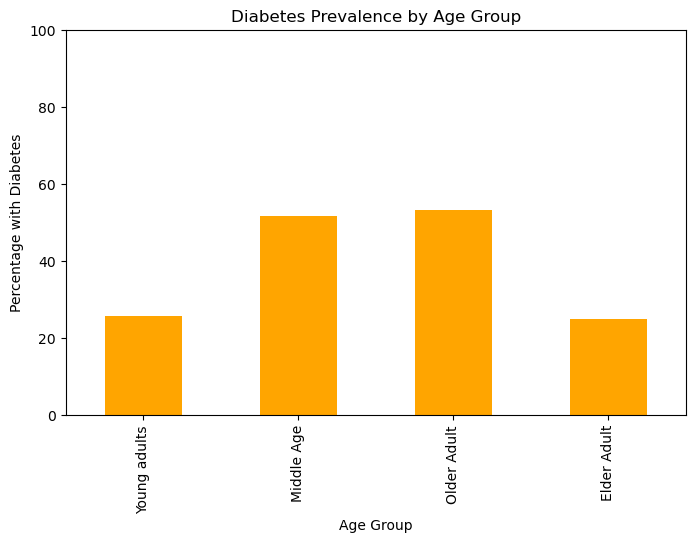

In [35]:
age_group_summary["Diabetes"].plot(kind="bar", color = "orange", figsize=(8,5))
plt.title("Diabetes Prevalence by Age Group")
plt.ylabel("Percentage with Diabetes")
plt.xlabel("Age Group")
plt.ylim(0, 100)
plt.show()

Based on the analysis, diabetes prevalence increases significantly with age, especially from young adulthood into middle and older adulthood:
- Young Adults (20-34) have the lowest diabetes rate at 25.82%
- Middle Age (35-49) and Older Adults (50-64) show nearly equal splits, with slightly more than 50% diagnosed with diabetes.
- In the Elder Adults (65-85) group, prevalence drops back to 25%, which could be due to a smaller sample size, survivor bias or data imbalance.

Overall, this shows that diabetes is more common in people over 40, particularly between 35 and 64, while younger groups have a much lower prevalence.

- Visualization to show Diabetes by AgeGroup using a Count Plot

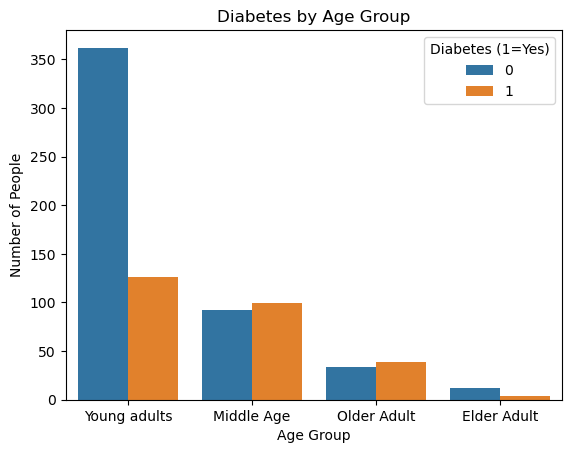

In [37]:
sns.countplot(x='AgeGroup', hue='Outcome', data=df)
plt.title("Diabetes by Age Group")
plt.ylabel("Number of People")
plt.xlabel("Age Group")
plt.legend(title="Diabetes (1=Yes)")
plt.show()

- The countplot clearly shows that most individuals in the dataset are young adults, but diabetes becomes more prevalent in the middle and older age groups, even if those groups have fewer total people. This support the trend that age is a significant factor in diabetes risk, especially from age 35 to 64.

**Scatter plot to show Age vs Glucose by Diabetes Outcome**

<function matplotlib.pyplot.show(close=None, block=None)>

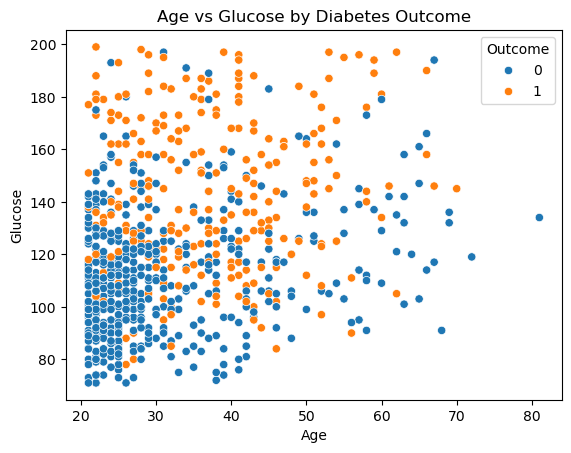

In [38]:
sns.scatterplot(data=df, x='Age', y='Glucose', hue='Outcome')
plt.title('Age vs Glucose by Diabetes Outcome')
plt.show

- Orange dots are more concentrated in the upper range of glucose values above 140 and it suggests that higher glucose levels are strongly associated with diabetes.
- Most blue dots are clustered in the lower glucose range, indicating a low risk of diabetes.
- Age doesn't show a strong pattern, but older people (over 50) have slightly more cases.
- Most people with glucose below 100 don't have diabetes.

**Pairplot of Selected Features by Diabetes Outcome**

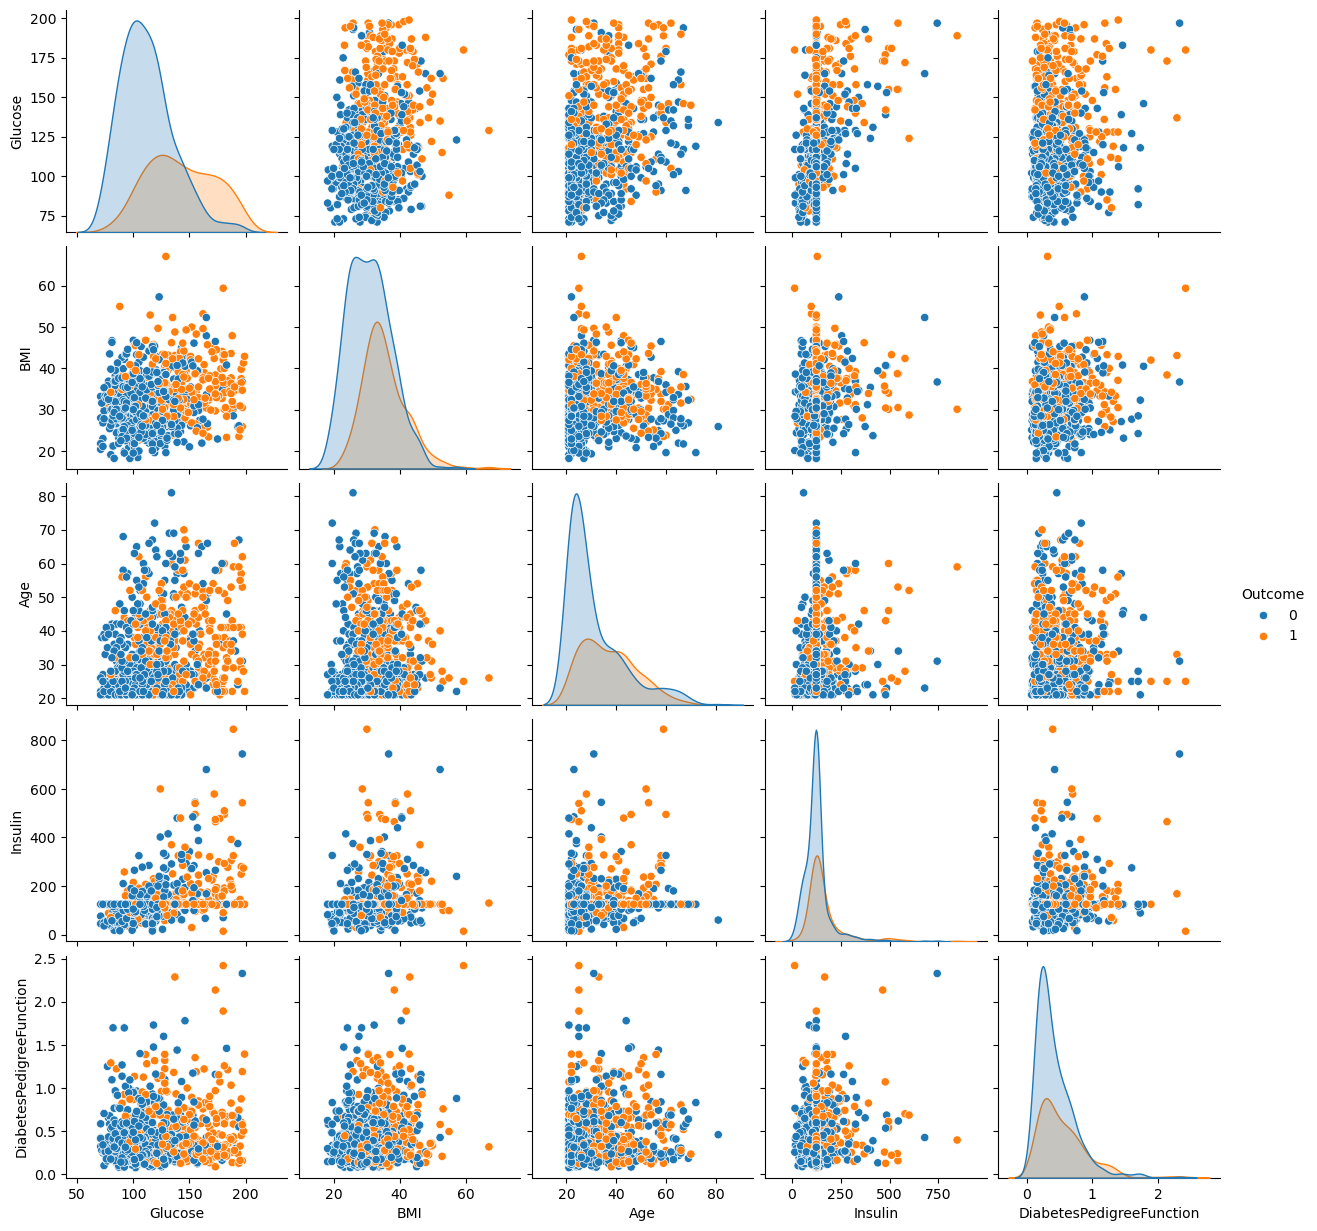

In [53]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction','Outcome']], hue='Outcome')

Based on the histograms(diagonal plots), the following columns appear highly skewed:
- Insulin - Strongly right-skewed
- DiabetesPedigreeFunction - Likely right-skewed

**Using Histplot to check skewness**

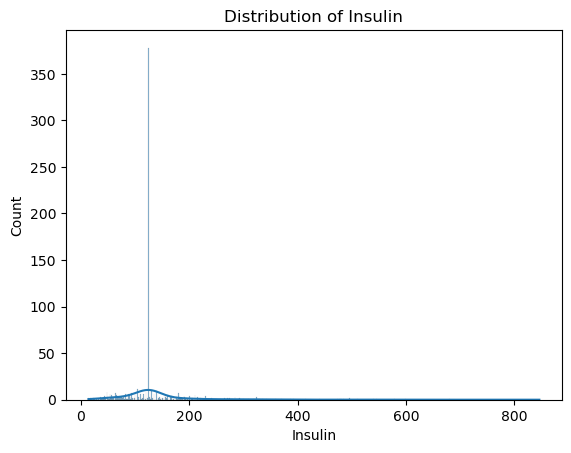

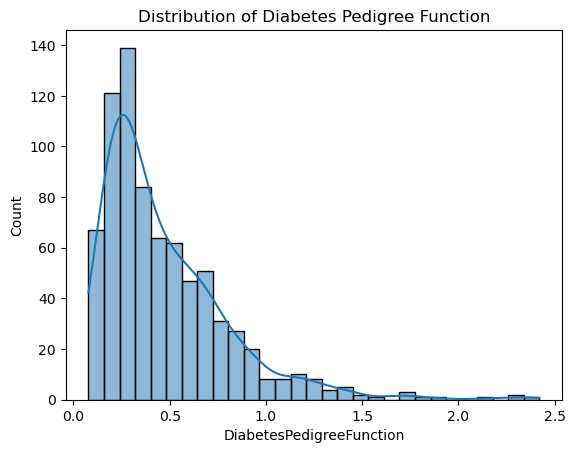

In [56]:
sns.histplot(df['Insulin'], kde= True)
plt.title('Distribution of Insulin')
plt.show()

sns.histplot(df['DiabetesPedigreeFunction'], kde= True)
plt.title('Distribution of Diabetes Pedigree Function')
plt.show()

This distribution shows that Insulin Column is Strongly Positively Skewed i.e the right tail of the distribution is longer or fatter than the left.
This distribution shows that DiabetesPedigreeFunction Column is moderately Positively Skewed i.e the right tail of the distribution is longer or fatter than the left.

**Log Transformation to reduce Skewness**

In [57]:
df['Insulin'] = np.log1p(df['Insulin'])
df['DiabetesPedigreeFunction'] = np.log1p(df['DiabetesPedigreeFunction'])

In [66]:
df['Outcome'].skew()

0.635016643444986

**Treating the Outcome Column**

In [68]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

- 500 people are non-diabetic
- 268 people are diabetics

**Visualization using a Countplot to check diabetes status by number of people** 

Text(0.5, 1.0, 'Diabetes Prevalence')

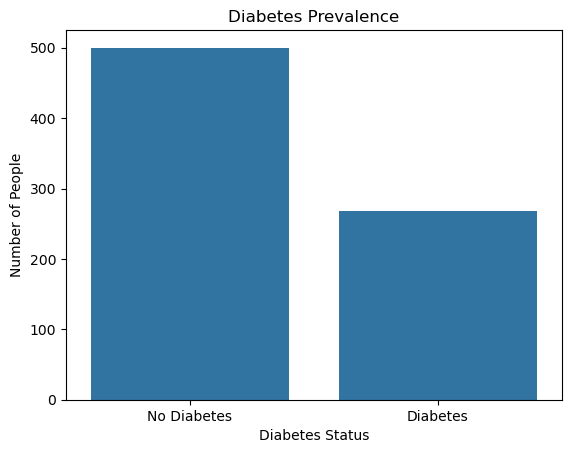

In [67]:
sns.countplot(x='Outcome', data=df)
plt.xticks([0,1], ['No Diabetes', 'Diabetes'])
plt.xlabel('Diabetes Status')
plt.ylabel('Number of People')
plt.title('Diabetes Prevalence')

## One Hot Encoding

In [73]:
df = pd.get_dummies(df, columns=['BMICategory', 'AgeGroup'], drop_first=True)

In [74]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory_Obese,BMICategory_Overweight,BMICategory_Underweight,AgeGroup_Middle Age,AgeGroup_Older Adult,AgeGroup_Elder Adult
0,6,148.0,72.0,35.0,4.836282,33.6,0.486738,50,1,True,False,False,False,True,False
1,1,85.0,66.0,29.0,4.836282,26.6,0.300845,31,0,False,True,False,False,False,False
2,8,183.0,64.0,29.0,4.836282,23.3,0.514021,32,1,False,False,False,False,False,False
3,1,89.0,66.0,23.0,4.553877,28.1,0.154436,21,0,False,True,False,False,False,False
4,0,137.0,40.0,35.0,5.129899,43.1,1.190279,33,1,True,False,False,False,False,False


## Using Standard Scaler

In [75]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
X_scaled

array([[ 0.63994726,  0.86510631, -0.05153906, ..., -0.57534557,
         3.08553852, -0.14586499],
       [-0.84488505, -1.26851097, -0.5644807 , ..., -0.57534557,
        -0.32409253, -0.14586499],
       [ 1.23388019,  2.05044924, -0.73546125, ..., -0.57534557,
        -0.32409253, -0.14586499],
       ...,
       [ 0.3429808 , -0.04930109, -0.05153906, ..., -0.57534557,
        -0.32409253, -0.14586499],
       [-0.84488505,  0.12003361, -1.07742234, ...,  1.73808585,
        -0.32409253, -0.14586499],
       [-0.84488505, -0.99757544, -0.2225196 , ..., -0.57534557,
        -0.32409253, -0.14586499]])

## Using Train Test Split

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMICategory_Obese         768 non-null    bool   
 10  BMICategory_Overweight    768 non-null    bool   
 11  BMICategory_Underweight   768 non-null    bool   
 12  AgeGroup_Middle Age       768 non-null    bool   
 13  AgeGroup_Older Adult      768 non-null    bool   
 14  AgeGroup_E

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) #80:20

In [80]:
X_train.shape

(614, 14)

In [81]:
X_test.shape

(154, 14)

In [82]:
print("Train set distribution:\n", y_train.value_counts(normalize=True))
print("\nTest set distribution:\n", y_test.value_counts(normalize=True))

Train set distribution:
 Outcome
0    0.653094
1    0.346906
Name: proportion, dtype: float64

Test set distribution:
 Outcome
0    0.642857
1    0.357143
Name: proportion, dtype: float64


- After performing a stratified train-test split, The class distribution in the test set is very close to that in the training set. This means there's no significant leakage or bias between train/test splits. 

## Logistic Regression

In [83]:
model = LogisticRegression(class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [84]:
y_pred = model.predict(X_test)

In [85]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6883116883116883

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        99
           1       0.55      0.76      0.64        55

    accuracy                           0.69       154
   macro avg       0.69      0.71      0.68       154
weighted avg       0.73      0.69      0.69       154


Confusion Matrix:
 [[64 35]
 [13 42]]


In [86]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

**Creating a heat map of the confusion matrix**

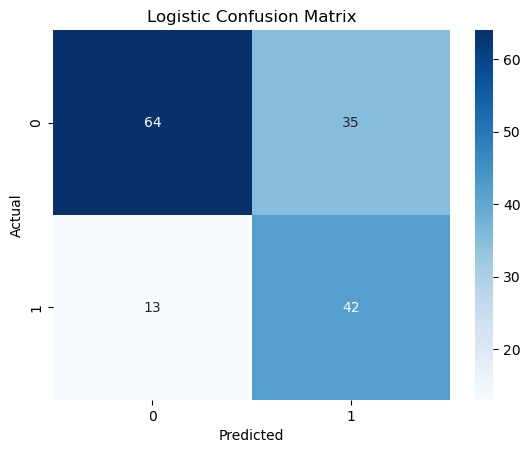

In [87]:
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Confusion Matrix')
plt.show()

*Class 0 (Negative):* 
- 64 correctly predicted as 0 -> True Negatives
- 35 incorrectly predicted as 1 -> False Positive

*Class 1 (Positive):* 
- 42 correctly predicted as 1 -> True Positives
- 13 incorrectly predicted as 0 -> False Negatives

## Using Decision Tree Model

In [88]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [89]:
y_pred_dt = dt_model.predict(X_test)

In [90]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6948051948051948

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75        99
           1       0.56      0.64      0.60        55

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.70      0.69      0.70       154


Confusion Matrix:
 [[72 27]
 [20 35]]


In [91]:
cm = confusion_matrix(y_test, y_pred_dt)

**Creating a heat map of the confusion matrix**

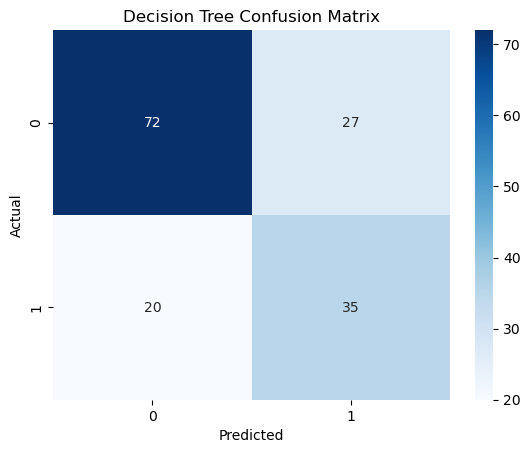

In [92]:
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

*Class 0 (Negative):* 
- 72 correctly predicted as 0 -> True Negatives
- 27 incorrectly predicted as 1 -> False Positive

*Class 1 (Positive):* 
- 35 correctly predicted as 1 -> True Positives
- 20incorrectly predicted as 0 -> False Negatives

## Using Random Forest Model

In [93]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [94]:
y_pred_rf = rf_model.predict(X_test)

In [95]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


Confusion Matrix:
 [[78 21]
 [20 35]]


In [96]:
cm = confusion_matrix(y_test, y_pred_rf)

**Creating a heat map of the confusion matrix**

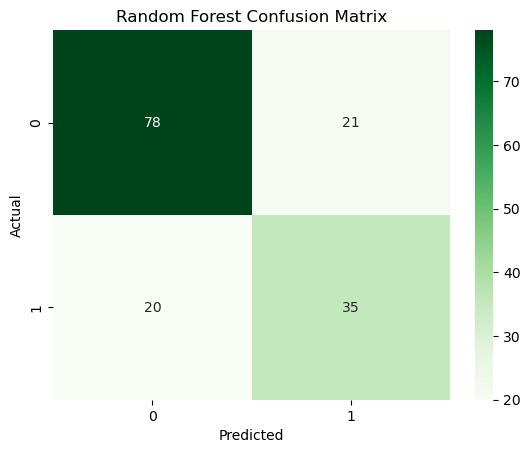

In [97]:
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

*Class 0 (Negative):* 
- 78 correctly predicted as 0 -> True Negatives
- 21 incorrectly predicted as 1 -> False Positive

*Class 1 (Positive):* 
- 35 correctly predicted as 1 -> True Positives
- 20 incorrectly predicted as 0 -> False Negatives

## Using Smote to balance the target variable

In [98]:
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled =smote_enn.fit_resample(X_train, y_train)

In [99]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [100]:
y_train_resampled

0      0
1      0
2      0
3      0
4      0
      ..
450    1
451    1
452    1
453    1
454    1
Name: Outcome, Length: 455, dtype: int64

In [101]:
y_train.shape

(614,)

In [102]:
y_train_resampled.shape

(455,)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2,random_state=42)

In [104]:
rf_model_2 = RandomForestClassifier(random_state=42)
rf_model_2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
y_pred_rf2 = rf_model_2.predict(X_test)

In [106]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf2))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf2))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf2))

Random Forest Accuracy: 0.9340659340659341

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.94      0.94      0.94        49

    accuracy                           0.93        91
   macro avg       0.93      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91


Confusion Matrix:
 [[39  3]
 [ 3 46]]


In [108]:
cm = confusion_matrix(y_test, y_pred_rf2)

**Creating a heat map of the confusion matrix**

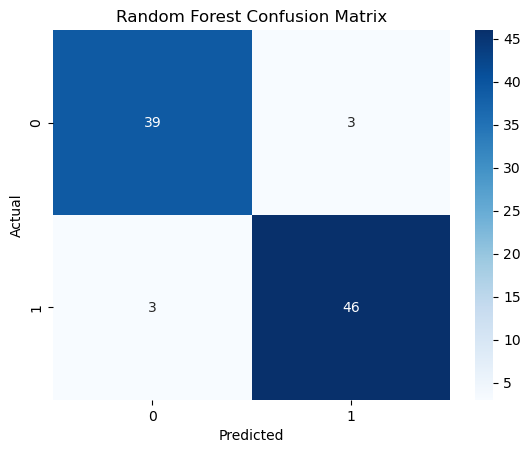

In [110]:
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

*Class 0 (Negative):* 
- 39 correctly predicted as 0 -> True Negatives
- 3 incorrectly predicted as 1 -> False Positive

*Class 1 (Positive):* 
- 46 correctly predicted as 1 -> True Positives
- 3 incorrectly predicted as 0 -> False Negatives